In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\HP\Downloads\\archive\\spam.csv",encoding ='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df=df.rename(columns={'v1':'Message_Type','v2':'Message'})

In [8]:
df.isnull().sum()

Message_Type    0
Message         0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Message_Type']=encoder.fit_transform(df['Message_Type'])
df['Message_Type']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Message_Type, Length: 5169, dtype: int32

In [13]:
df.head()

,Message_Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

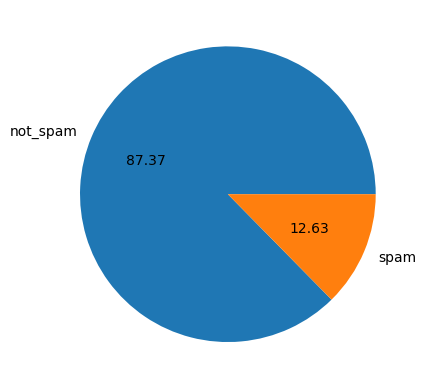

In [15]:
plt.pie(df['Message_Type'].value_counts(),labels=['not_spam','spam'],autopct='%0.2f')
plt.show()

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: [WinError 10060] A connection attempt
[nltk_data]     failed because the connected party did not properly
[nltk_data]     respond after a period of time, or established
[nltk_data]     connection failed because connected host has failed to
[nltk_data]     respond


False

##Now lets check the number of characters ,number of words,number of sentences in Spam and ham 

In [17]:
df['num_characters']=df['Message'].apply(len)
df.head()

,Message_Type,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
##For number of words;
from nltk.tokenize import word_tokenize
df['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [19]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,Message_Type,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
##For a number of sentences :

df['num_sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,Message_Type,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
#For ‘Ham’ messages:
df[df["Message_Type"]==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
#For ‘Spam’ messages:
df[df["Message_Type"]==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


We can clearly see the spam messages are quite longer than the ham messages.

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

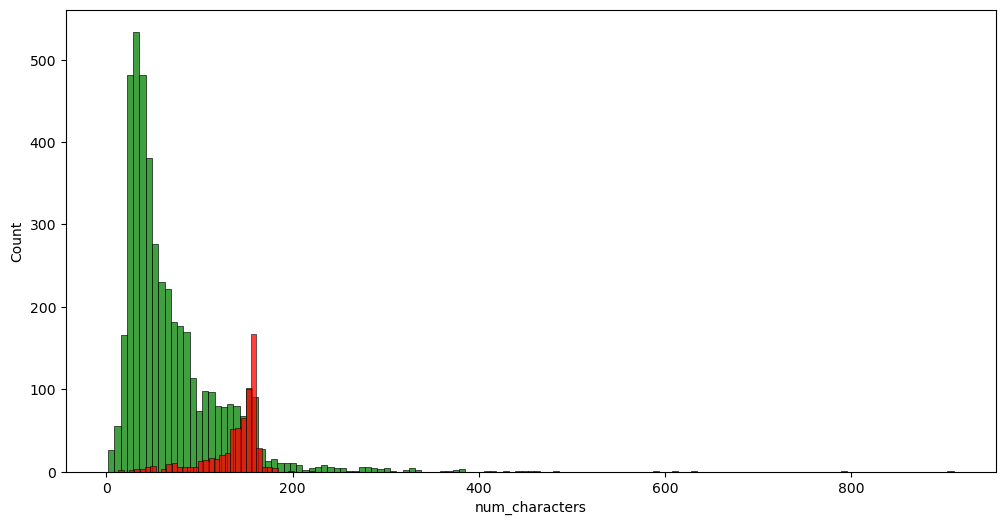

In [25]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['Message_Type']==0]['num_characters'],color='green')
sns.histplot(df[df['Message_Type']==1]['num_characters'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

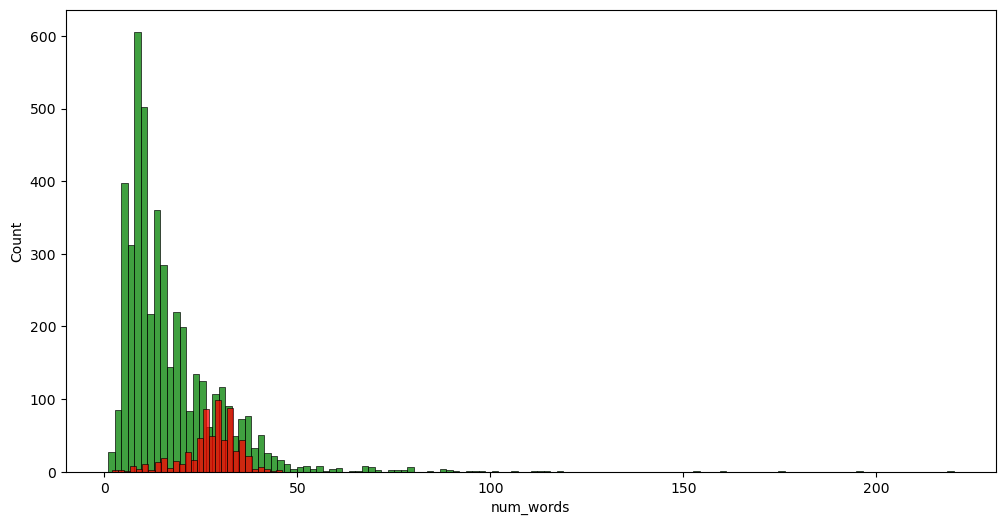

In [26]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['Message_Type']==0]['num_words'],color='green')
sns.histplot(df[df['Message_Type']==1]['num_words'],color='red')

<AxesSubplot:>

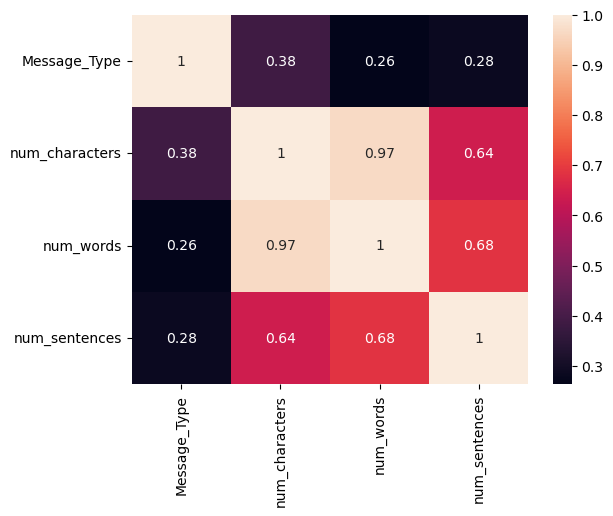

In [27]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

we will drop all the columns as it will be very tedious so we only keep num_characters as it is highly correlated with Message_Type

### Data Modelling

In [28]:
x=df['Message']
y=df['Message_Type']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [30]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn import svm

In [31]:
cv=CountVectorizer()

In [32]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() 

In [34]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, prediction_train)*100)

99.75816203143893


In [36]:
prediction_test = lr.predict(x_test_cv)


In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_test)*100)

97.58220502901354
